In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import sqlite3
from astroquery.gaia import Gaia
import astropy.units as u
from astropy.coordinates import SkyCoord
import math

## Importing the OGLE Data

First we need to get both data sets for stars within the Milky Way. The first cell gets all OGLE light curve data from stars in the bulge and disk.

In [215]:
import os

directory = 'OGLE\\flux\\I\\'

ogle_loc = pd.read_csv("OGLE\\query_1685943694.73114w.txt", sep="\t")

ogle_ind = [0 for x in range(ogle_loc.shape[0])] 
for i in range(1, len(ogle_ind)):
    ogle_ind[i] = i

ogle_loc['index'] = ogle_ind

for i in range(ogle_loc.shape[0]):
    file = os.path.join(directory, ogle_loc['ID'][i] + ".dat")
    if not os.path.isfile(file):
        ogle_loc = ogle_loc.drop(i)
ogle_loc

,ID,Mode,RA,Decl,I,V,V_I,P_1,dP_1,index
0,OGLE-BLG-CEP-001,F,263.562630,-27.398250,17.395,20.859,3.464,2.597573,1.700000e-06,0
1,OGLE-BLG-CEP-002,F,264.494340,-22.503361,15.734,17.589,1.855,2.025573,1.300000e-06,1
2,OGLE-BLG-CEP-003,F1,266.182455,-23.723639,16.424,18.124,1.700,1.235729,5.900000e-06,2
3,OGLE-BLG-CEP-004,12,266.457630,-33.768778,16.178,17.757,1.579,0.240046,2.000000e-07,3
5,OGLE-BLG-CEP-007,F,267.466830,-22.824833,16.417,18.592,2.175,1.545501,1.000000e-06,5
...,...,...,...,...,...,...,...,...,...,...
2035,OGLE-GD-CEP-1879,F,286.545705,11.399444,14.065,-99.990,-99.990,5.227524,3.402000e-04,2035
2036,OGLE-GD-CEP-1880,1,286.881120,14.676083,15.496,-99.990,-99.990,0.274582,1.300000e-06,2036
2037,OGLE-GD-CEP-1881,F,287.035920,8.636250,14.351,-99.990,-99.990,8.837560,7.185000e-04,2037
2038,OGLE-GD-CEP-1882,F1,288.272835,12.633972,11.196,-99.990,-99.990,5.624909,2.066000e-04,2038


This cell adds my own calculations of the apparent magnitude and uncertainty.

In [500]:
calc_app_mag = [0 for x in range(ogle_loc.shape[0])] 
calc_app_mag_unc = [0 for x in range(ogle_loc.shape[0])]

directory = 'OGLE\\flux\\I\\'

ids = ogle_loc['ID'].to_list()

for i in range(ogle_loc.shape[0]):
    file = os.path.join(directory, ids[i] + ".dat")
    if os.path.isfile(file):
        l_curve = np.loadtxt(file)
        flux = l_curve[:, 1]
        flux_unc = l_curve[:, 2]
        calc_app_mag[i] = np.mean(flux)
        calc_app_mag_unc[i] = np.sqrt(np.mean(flux_unc**2))

ogle_loc["app_mag"] = calc_app_mag
ogle_loc["app_mag_unc"] = calc_app_mag_unc
ogle_loc

,ID,Mode,RA,Decl,I,V,V_I,P_1,dP_1,index,app_mag,app_mag_unc
0,OGLE-BLG-CEP-001,F,263.562630,-27.398250,17.395,20.859,3.464,2.597573,1.700000e-06,0,17.407995,0.013175
1,OGLE-BLG-CEP-002,F,264.494340,-22.503361,15.734,17.589,1.855,2.025573,1.300000e-06,1,15.772704,0.006314
2,OGLE-BLG-CEP-003,F1,266.182455,-23.723639,16.424,18.124,1.700,1.235729,5.900000e-06,2,16.428277,0.007213
3,OGLE-BLG-CEP-004,12,266.457630,-33.768778,16.178,17.757,1.579,0.240046,2.000000e-07,3,16.179836,0.006613
5,OGLE-BLG-CEP-007,F,267.466830,-22.824833,16.417,18.592,2.175,1.545501,1.000000e-06,5,16.430670,0.007613
...,...,...,...,...,...,...,...,...,...,...,...,...
2035,OGLE-GD-CEP-1879,F,286.545705,11.399444,14.065,-99.990,-99.990,5.227524,3.402000e-04,2035,14.056563,0.005826
2036,OGLE-GD-CEP-1880,1,286.881120,14.676083,15.496,-99.990,-99.990,0.274582,1.300000e-06,2036,15.495730,0.008899
2037,OGLE-GD-CEP-1881,F,287.035920,8.636250,14.351,-99.990,-99.990,8.837560,7.185000e-04,2037,14.357800,0.006164
2038,OGLE-GD-CEP-1882,F1,288.272835,12.633972,11.196,-99.990,-99.990,5.624909,2.066000e-04,2038,11.205014,0.005000


This cell give my initial calculation of the periods of the stars using Lomb-Scargle.

In [477]:
from astropy.timeseries import LombScargle

ids = ogle_loc['ID'].to_list()

period_man = [0 for x in range(len(ids))]
period_lit = ogle_loc['P_1'].to_numpy()

# 
for i in range(ogle_loc.shape[0]):
    l_curve = np.loadtxt(directory + ids[i] + ".dat")
    y = l_curve[:, 1]
    y_unc = l_curve[:, 2]
    t_obs = l_curve[:, 0]
    frequency = 1/np.linspace(period_lit[i] / 10, period_lit[i] * 2, 10000)
    power = LombScargle(t_obs, y, y_unc).power(frequency)
    period_man[i] = 1/frequency[np.argmax(power)]

print(period_man)

[2.597390651740174, 2.025431195709571, 0.9052623117311732, 0.4623030050705071, 1.5453929041034105, 0.37509774118111816, 0.5299282987118712, 0.41984285674367433, 0.7895732270747075, 1.3357898507810781, 0.5522720965776577, 0.42198996646864695, 3.7361600243304323, 0.6499592268346834, 0.9057761317281727, 0.8838123735073506, 1.1948687449664968, 1.6004361504210423, 5.244432627296729, 1.3583124019651969, 3.021862433663366, 0.19329133625362538, 3.780596713233324, 0.5634779349924992, 0.5828942904620463, 2.937948608629863, 4.290898586028603, 3.965948636392639, 0.7411702092639263, 2.3068206950955097, 0.9224387955545555, 8.486962411619162, 18.632390552127216, 1.5044829682858285, 3.640305835264527, 0.5052368274087409, 4.768623139623963, 3.781383258165817, 4.487870395657565, 0.5379704606060606, 4.6383747585608575, 3.3737973940274033, 1.566337056687669, 1.379471620568057, 0.6488270743824383, 4.520079130335033, 2.9813986666086607, 2.610533831561156, 0.592510592451245, 3.332020318919892, 1.210059681420

This cell checks for mismatches between OGLE and my periods (to be used later with narrowed down stars).

In [478]:
period_arr = ogle_loc['P_1'].to_numpy()
mismatches = []

for i in range(len(period_man)):
    if abs(period_man[i] - period_lit[i]) > 0.1:
        mismatches.append(i)

print(mismatches)
print(len(mismatches))

[2, 3, 5, 7, 8, 9, 10, 11, 13, 14, 15, 23, 30, 39, 48, 57, 59, 73, 74, 76, 77, 146, 149, 152, 184, 194, 198, 216, 244, 283, 398, 406, 421, 443, 515, 562, 574, 637, 657, 690, 816, 875, 880, 915, 1034, 1056, 1064, 1069, 1080, 1127, 1184, 1187, 1332, 1408, 1411, 1424, 1582, 1597, 1624, 1632, 1650, 1689, 1691, 1714, 1718, 1724, 1727, 1732, 1738, 1741, 1743, 1745, 1754, 1762, 1767, 1775, 1776, 1780, 1782, 1791, 1793, 1795, 1797, 1807, 1808, 1817, 1826, 1828, 1832, 1835, 1836, 1847, 1852, 1854, 1861, 1864, 1873, 1878, 1915, 1921, 1947, 1949, 1953, 1958, 1965, 1968, 1981, 1983, 1984, 1988, 1990, 2002, 2014, 2019, 2022, 2024, 2028, 2029, 2030]
119


## Importing Dust Maps for Milky Way

In [222]:
extinction =pd.read_csv("extinction_v2.txt", sep = "\t")
extinction

,ra,dec,cutout_size,E_B_V_SandF,mean_E_B_V_SandF,stdev_E_B_V_SandF,max_E_B_V_SandF,min_E_B_V_SandF,AV_SandF,E_B_V_SFD,mean_E_B_V_SFD,stdev_E_B_V_SFD,max_E_B_V_SFD,min_E_B_V_SFD,AV_SFD
0,263.56263,-27.39825,5.0,1.6363,1.5790,0.0700,1.6623,1.3987,5.0727,1.9027,1.8361,0.0814,1.9329,1.6264,5.8985
1,264.49434,-22.50336,5.0,0.8733,0.8762,0.0314,0.9516,0.8298,2.7073,1.0155,1.0188,0.0365,1.1065,0.9649,3.1481
2,266.18246,-23.72364,5.0,0.6705,0.6790,0.0232,0.7235,0.6478,2.0785,0.7796,0.7896,0.0269,0.8413,0.7533,2.4169
3,266.45763,-33.76878,5.0,1.1550,1.1385,0.0762,1.4139,1.0685,3.5805,1.3430,1.3239,0.0886,1.6440,1.2424,4.1634
4,267.46683,-22.82483,5.0,1.3428,1.3762,0.1257,1.6491,1.1758,4.1628,1.5614,1.6003,0.1462,1.9175,1.3673,4.8404
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2029,286.54571,11.39944,5.0,1.8287,1.8360,0.0196,1.8778,1.8038,5.6688,2.1263,2.1349,0.0228,2.1835,2.0974,6.5917
2030,286.88112,14.67608,5.0,0.9318,0.9435,0.0211,0.9825,0.9009,2.8886,1.0835,1.0970,0.0246,1.1424,1.0476,3.3589
2031,287.03592,8.63625,5.0,6.4783,6.5437,0.2689,7.0062,5.9045,20.0826,7.5329,7.6090,0.3127,8.1467,6.8657,23.3519
2032,288.27284,12.63397,5.0,3.5062,3.4392,0.3533,3.9914,2.7596,10.8691,4.0769,3.9991,0.4108,4.6411,3.2089,12.6385


## Getting Gaia Data
This cell attempts to match the data from OGLE with a star in the GAIA data using the right ascension and declination. If the distance is > 1e-4, the star is discarded from consideration.

In [220]:
ra1 = ogle_loc['RA'].to_numpy()
dec1 = ogle_loc['Decl'].to_numpy()
best_matches = []

Gaia.MAIN_GAIA_TABLE = "gaiadr3.gaia_source"
for i in range(len(ra1)):
    coord = SkyCoord(ra=ra1[i], dec=dec1[i], unit=(u.degree, u.degree), frame='icrs')
    width = u.Quantity(0.1, u.deg)
    height = u.Quantity(0.1, u.deg)
    r = Gaia.query_object_async(coordinate=coord, width=width, height=height)
    if (r[0][0] < 0.0001):
        best_matches.append((i, r[0][2][9:], r[0][0]))

job = Gaia.launch_job("select source_id, parallax, parallax_error, parallax_over_error "
                        "from gaiadr3.gaia_source "
                        "where source_id = " + best_matches[0][1])
res = job.get_results()
parallaxes = res.to_pandas()

for i in range(1, len(best_matches)):
    job = Gaia.launch_job("select source_id, parallax, parallax_error, parallax_over_error "
                        "from gaiadr3.gaia_source "
                        "where source_id = " + best_matches[i][1])
    res = job.get_results()
    frames = [parallaxes, res.to_pandas()]
    parallaxes = pd.concat(frames)

INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]


In [221]:
parallaxes

,source_id,parallax,parallax_error,parallax_over_error
0,4061294515093575296,0.142666,0.253688,0.562368
0,4116820887409126912,-0.005391,0.063512,-0.084882
0,4068367505901854080,0.318242,0.100459,3.167882
0,4041832472037048832,-0.071828,0.095539,-0.751816
0,4068902040335100032,-0.041287,0.137033,-0.301289
...,...,...,...,...
0,4312703797298369408,0.109296,0.031249,3.497587
0,4512613840362612992,0.086374,0.052624,1.641323
0,4307562824473502208,-0.138473,0.141444,-0.978991
0,4313263895380890752,0.250670,0.031396,7.984064


In [223]:
ogle_arrnd = [0 for x in range(len(best_matches))] 
for i in range(len(ogle_arrnd)):
    ogle_ind[i] = int(best_matches[i][0])

print(ogle_ind)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 173, 174, 175, 176, 177, 178, 179, 180, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224

This cell sorts the Gaia data with respect to parallax_over_error (keeps track of OGLE index as well).

In [224]:
parallaxes['ogle'] = ogle_ind
sorted_par = parallaxes.sort_values(by = ['parallax_over_error'], ascending= False)
sorted_par

,source_id,parallax,parallax_error,parallax_over_error,ogle
0,5860015484240838656,0.796948,0.012661,62.943542,982
0,5546611514435107328,0.768019,0.012454,61.666882,1984
0,5323128423101511296,0.656267,0.013083,50.162102,413
0,5544619401213045504,2.792651,0.060240,46.359093,353
0,4273469167917138560,2.157061,0.047044,45.852310,1527
...,...,...,...,...,...
0,4064245436753378048,NaN,NaN,NaN,71
0,4070789764313823232,NaN,NaN,NaN,75
0,4069332151186531200,NaN,NaN,NaN,170
0,5253080422777567488,NaN,NaN,NaN,669


## Extinction Correction
This cell corrects for the dust exinction.

In [457]:
dust = extinction['E_B_V_SFD'].to_numpy() * 1.516

print(calc_app_mag)
app_mag = calc_app_mag - dust
print(app_mag)

[17.407994748687173, 15.772703629032259, 16.428276555023924, 16.17983603896104, 16.4306699669967, 16.017517683239365, 15.863728089887642, 13.996152051021886, 14.667748531362514, 16.84040369768387, 15.641370168483647, 14.624875268817206, 15.084069273743015, 16.10782560483871, 15.667887640449438, 16.93159481865285, 15.744416058394162, 18.20495681511471, 15.671986083499005, 16.256781188118815, 16.33040945945946, 14.624067055393587, 19.859933333333334, 16.449565567176183, 17.061859519408504, 17.463595352564106, 15.843474020783372, 16.660301270417424, 17.93348417721519, 16.849337953091684, 17.01164345991561, 12.557251162790697, 16.492048192771087, 19.76460601137287, 16.774164383561644, 17.058968387776606, 16.026456086286593, 18.702599037690458, 15.630789743589744, 16.458363863447126, 16.345133943427623, 18.789232142857145, 18.363684210526312, 17.0727202680067, 15.664210820895523, 17.496153846153845, 16.908700980392158, 14.511659016393443, 17.205871014492754, 15.70776414189837, 17.2371463700

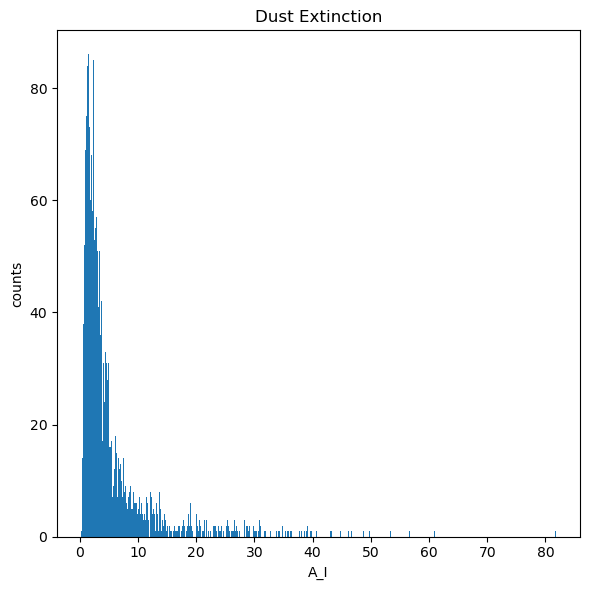

In [458]:
fig, ax = plt.subplots(figsize=(6,6))
ax.set_xlabel('A_I')
ax.set_ylabel('counts')
ax.set_title("Dust Extinction")
ax.hist(dust, bins=500)
fig.tight_layout()

## Calculating Absoulte Magnitudes for Milky Way Stars
This cell calculates the distance and its uncertainty using parallax, along with the absolute magnitude from all the things needed for that.

In [765]:
import math

par_arr = sorted_par['parallax'].to_numpy()
par_err_arr = sorted_par['parallax_error'].to_numpy()
ogle_arr = sorted_par['ogle'].to_numpy()

period_raw = ogle_loc['P_1'].to_numpy()

cutoff = 250

distance = [0 for x in range(cutoff)]
for i in range(cutoff):
    distance[i] = 1 / (par_arr[i] * 1e-3)
print(distance)

distance_err = [0 for x in range(cutoff)]
for i in range(cutoff):
    distance_err[i] = (par_err_arr[i] / par_arr[i]) * distance[i]
print(distance_err)

abs_mag = [0 for x in range(cutoff)]
for i in range(cutoff):
    abs_mag[i] = app_mag[ogle_arr[i]] + 5 - 5 * math.log10(distance[i])
print(abs_mag)

abs_mag_err = [0 for x in range(cutoff)]
for i in range(cutoff):
    abs_mag_err[i] = np.sqrt(calc_app_mag_unc[ogle_arr[i]]**2 +  (5 * distance_err[i] / distance[i])**2)
print(abs_mag_err)


[1254.7877201290455, 1302.0511931788565, 1523.7705092374154, 358.08272691629884, 463.59368368146323, 1892.0690803815583, 724.330064706399, 2156.2951792323465, 949.9860698980616, 2415.662699334624, 2516.2393163631837, 2715.037350666008, 2438.935399639436, 2226.2760597381025, 2738.2781452793547, 2316.813650910813, 2819.354628468205, 2322.846183358793, 3348.9381496301266, 1793.4126200621727, 3367.1782254482973, 2240.6423542188236, 3658.474001588931, 3763.6672408519253, 2551.739290867711, 2384.743021133923, 3562.426333272468, 3914.378161093335, 3345.8559333511416, 3640.139157970775, 3343.8894779121047, 4698.082107093783, 3109.940961163313, 2474.8396153000917, 2646.7372216942745, 4043.185862742834, 1635.294468680274, 3243.5539900524795, 3203.249042952723, 2135.440342905289, 2778.908930937149, 2667.1933889809334, 1417.6742758570774, 3806.0128321773773, 3185.370888511845, 4374.34333487716, 3514.304017244267, 2872.310069236199, 5098.516586108219, 4928.568312249944, 4354.897397695987, 4583.6003

This cell fits a linear model to the period-luminosity relation. Note that all the if statements help correct for the period mismatches from earlier.

In [766]:
from scipy.optimize import curve_fit

def linear(x, slope, intercept):
    return x*slope + intercept

period_arr = [0 for x in range(cutoff)]
for i in range(cutoff):
    period_arr[i] = math.log10(period_man[ogle_arr[i]])
print(period_arr)

i = cutoff - 1
# this is where I remove the blg, but there was no measurements that made it past the other filters anyways
while i >= 0:
    if ogle_arr[i] in mismatches:
        print(ogle_loc['ID'][ogle_arr[i]])
    if ogle_loc['ID'][ogle_arr[i]] == "OGLE-GD-CEP-0457":
        period_arr[i] = math.log10(16.6035567)
    elif ogle_loc['ID'][ogle_arr[i]] == "OGLE-GD-CEP-1165":
        period_arr[i] = math.log10(17.68293)
    elif ogle_loc['ID'][ogle_arr[i]] == "OGLE-GD-CEP-1866":
        period_arr[i] = math.log10(8.03699)
    elif ogle_loc['ID'][ogle_arr[i]] == "OGLE-GD-CEP-1868":
        period_arr[i] = math.log10(9.06228)
    elif ogle_loc['ID'][ogle_arr[i]] == "OGLE-GD-CEP-1797":
        period_arr[i] = math.log10(0.29994)
    elif ogle_loc['ID'][ogle_arr[i]] == "OGLE-GD-CEP-0216":
        period_arr[i] = math.log10(1.83384)
    elif ogle_loc['ID'][ogle_arr[i]] == "OGLE-GD-CEP-1834":
        period_arr[i] = math.log10(12.00924)
    elif ogle_loc['ID'][ogle_arr[i]] == "OGLE-GD-CEP-1010":
        period_arr[i] = math.log10(0.80542)
    elif ogle_loc['ID'][ogle_arr[i]] == "OGLE-GD-CEP-1825":
        period_arr[i] = math.log10(2.97722)
    elif ogle_loc['ID'][ogle_arr[i]] == "OGLE-GD-CEP-0697":
        period_arr[i] = math.log10(2.32102)
    elif ogle_loc['ID'][ogle_arr[i]] == "OGLE-GD-CEP-0026":
        period_arr[i] = math.log10(2.210576)
    elif ogle_loc['ID'][ogle_arr[i]] == "OGLE-GD-CEP-1263":
        period_arr[i] = math.log10(3.16342)
    elif ogle_loc['ID'][ogle_arr[i]] == "OGLE-GD-CEP-1611":
        period_arr[i] = math.log10(0.70215)
    elif ogle_loc['ID'][ogle_arr[i]] == "OGLE-GD-CEP-0510":
        period_arr[i] = math.log10(5.02279)
    elif ogle_loc['ID'][ogle_arr[i]] == "OGLE-GD-CEP-1424":
        period_arr[i] = math.log10(3.01825)
    elif ogle_loc['ID'][ogle_arr[i]] == "OGLE-GD-CEP-1828":
        period_arr[i] = math.log10(0.53415)
    if abs_mag[i] < -15 or abs_mag[i] > -1 or dust[ogle_arr[i]] > 3 or ogle_loc['ID'][ogle_arr[i]][5:8] == "BLG" or ogle_loc['ID'][ogle_arr[i]] == "OGLE-GD-CEP-1582" or ogle_loc['ID'][ogle_arr[i]] == "OGLE-GD-CEP-0637" or ogle_loc['ID'][ogle_arr[i]] == "OGLE-GD-CEP-1863":
        del period_arr[i]
        del abs_mag[i]
        del abs_mag_err[i]    
    i -= 1

print(len(period_arr))

result = curve_fit(linear, period_arr, abs_mag, sigma=abs_mag_err)
print(result)
slope = result[0][0]
intercept = result[0][1]
slope_err = result[1][0][0]
intercept_err = result[1][1][1]

[0.8670393177074959, -0.09395527244649424, 0.7230606353120309, 0.2604370605214675, 0.4812474472886948, 0.4206813155915653, 0.20939463184464766, -0.6373204750268511, -0.523041667720123, 0.28836605795002906, -0.18446913238485904, -0.5037655814138827, 0.31406018795032714, -0.5387476833268705, -0.524871206361467, -0.618466789873035, 0.5538089377080314, 0.630942427186006, -0.22126838690981623, 0.7050372124712202, 0.5107755461071241, -0.3481400086741281, 0.6115469600712984, 0.4193261656911357, -0.1815630761735755, 0.8202378100938669, 0.7461690735030567, 0.010007199543371217, 0.5273437154716754, 0.7068799773573675, 0.11009597940327284, 0.5319379290277153, -0.055744196548983646, 0.21796836013329887, -0.19251724453968252, 0.36335777125650104, 0.4365625691955106, -0.46534986939485573, 0.45657997937669353, -0.04469099916961684, -0.6474926353790991, 0.7416656361399381, 0.4414078164880632, 0.5707756005714251, 0.5952584305632758, 0.5977974510654909, 0.4983130025507717, -0.4070840937581892, 0.4347501

The best-fit relationship is M = (-2.15 +/- 0.04) * log(P) + (-2.35 +/- 0.01)


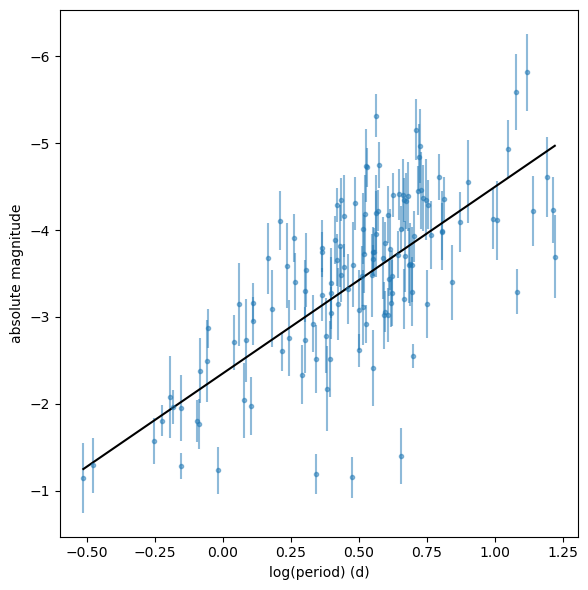

In [767]:
x_line = np.linspace(min(period_arr), max(period_arr), 1000)
y_line = slope * x_line + intercept

fig, ax = plt.subplots(figsize=(6,6))
ax.set_xlabel('log(period) (d)')
ax.set_ylabel('absolute magnitude')
ax.errorbar(period_arr, abs_mag, abs_mag_err, alpha = 0.5, fmt = '.')
ax.plot(x_line, y_line, c = 'black')
fig.gca().invert_yaxis()
fig.tight_layout()

print("The best-fit relationship is M = ({:.2f} +/- {:.2f}) * log(P) + ({:.2f} +/- {:.2f})".format(slope, slope_err, intercept, intercept_err))

## Example Period Calculation
Sorry it's different from the cepheid used in the paper, but it's the same idea.

In [744]:
#ogle_loc['ID'].to_list()[sorted_par['ogle'].to_list()[0]]
l_curve = np.loadtxt("OGLE\\flux\\I\\" + "OGLE-GD-CEP-1263" + ".dat")
y = l_curve[:, 1]
y_unc = l_curve[:, 2]
t_obs = l_curve[:, 0]

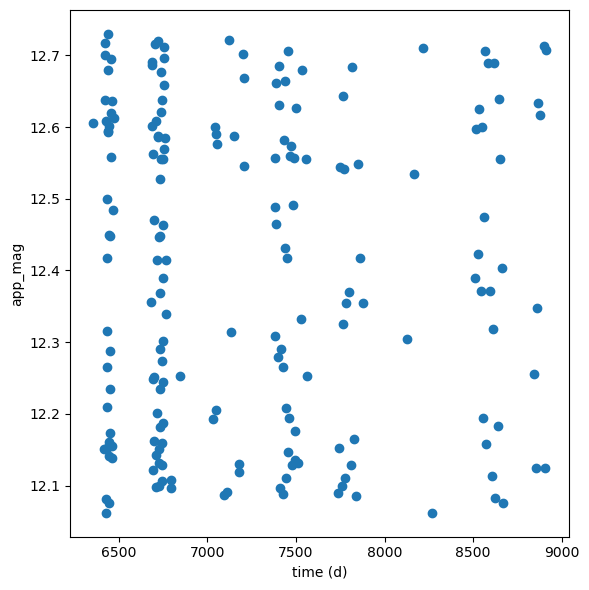

In [624]:
fig, ax = plt.subplots(figsize=(6,6))
ax.set_xlabel('time (d)')
ax.set_ylabel('app_mag')
ax.scatter(t_obs, y)
fig.tight_layout()

The best-fit period is 3.16342 d
3.163561


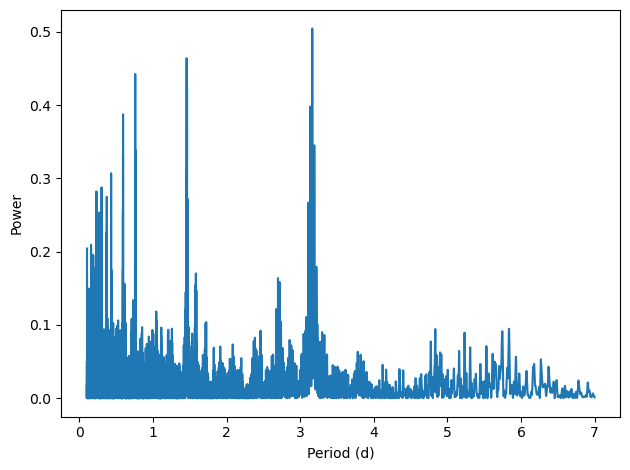

In [746]:
from astropy.timeseries import LombScargle

frequency = 1/np.linspace(0.1, 7, 100000)
power = LombScargle(t_obs, y, y_unc).power(frequency)
fig, ax = plt.subplots()
ax.plot(1/frequency, power)
ax.set_xlabel("Period (d)")
ax.set_ylabel("Power")
fig.tight_layout()

period = 1/frequency[np.argmax(power)]
print("The best-fit period is {:.5f} d".format(period))

print(ogle_loc['P_1'][ogle_loc.index[ogle_loc['ID'] == "OGLE-GD-CEP-1263"][0]])

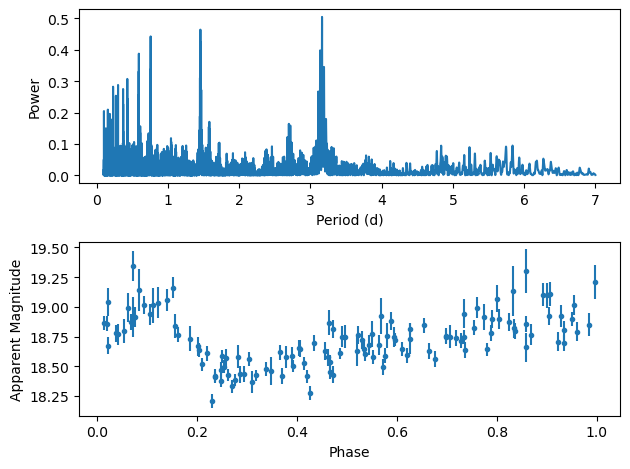

In [747]:
fig, axs = plt.subplots(2)
axs[0].plot(1/frequency, power)
axs[0].set_xlabel("Period (d)")
axs[0].set_ylabel("Power")
axs[1].errorbar(t_obs / period % 1, y, y_unc, fmt = '.')
axs[1].set_xlabel("Phase")
axs[1].set_ylabel("Apparent Magnitude")
fig.tight_layout()

## Getting OGLE data for LMC stars

In [496]:
lmc_stars = pd.read_csv("OGLE\\lmc_stars.txt", sep="\t")

directory = "OGLE\\flux\\I_2\\"

for i in range(lmc_stars.shape[0]):
    file = os.path.join(directory, lmc_stars['ID'][i] + ".dat")
    if not os.path.isfile(file):
        lmc_stars = lmc_stars.drop(i)
lmc_stars

,ID,Mode,RA,Decl,I,V,V_I,P_1,dP_1
0,OGLE-LMC-CEP-0001,1,67.740495,-69.060389,17.755,18.154,0.399,0.306818,4.000000e-07
1,OGLE-LMC-CEP-0002,F,67.946040,-69.819306,15.691,16.420,0.729,3.118149,1.090000e-05
2,OGLE-LMC-CEP-0003,1,68.773755,-70.424139,17.846,18.384,0.538,0.350096,5.000000e-07
3,OGLE-LMC-CEP-0004,1,68.833995,-69.802139,15.123,15.690,0.567,2.229639,6.500000e-06
4,OGLE-LMC-CEP-0005,F,68.881335,-69.734944,14.651,15.425,0.774,5.611949,1.350000e-05
...,...,...,...,...,...,...,...,...,...
4704,OGLE-LMC-CEP-4711,1,98.554545,-66.277333,17.381,17.902,0.521,0.498925,8.100000e-06
4705,OGLE-LMC-CEP-4712,F,104.740875,-68.310861,15.372,16.087,0.715,2.755153,1.900000e-05
4706,OGLE-LMC-CEP-4713,1,76.475085,-66.262278,16.654,17.272,0.618,0.785540,3.800000e-06
4707,OGLE-LMC-CEP-4714,F1,79.104840,-66.057278,18.341,18.928,0.587,0.363202,4.000000e-07


This cell calculates app_mag and its uncertainty for lmc stars.

In [499]:
lmc_app_mag = [0 for x in range(lmc_stars.shape[0])] 
lmc_app_mag_unc = [0 for x in range(lmc_stars.shape[0])]

directory = 'OGLE\\flux\\I_2\\'

ids = lmc_stars['ID'].to_list()

for i in range(lmc_stars.shape[0]):
    file = os.path.join(directory, ids[i] + ".dat")
    if os.path.isfile(file):
        l_curve = np.loadtxt(file)
        flux = l_curve[:, 1]
        flux_unc = l_curve[:, 2]
        lmc_app_mag[i] = np.mean(flux)
        lmc_app_mag_unc[i] = np.sqrt(np.mean(flux_unc**2))

lmc_stars["app_mag"] = lmc_app_mag
lmc_stars["app_mag_unc"] = lmc_app_mag_unc
lmc_stars

,ID,Mode,RA,Decl,I,V,V_I,P_1,dP_1,app_mag,app_mag_unc
0,OGLE-LMC-CEP-0001,1,67.740495,-69.060389,17.755,18.154,0.399,0.306818,4.000000e-07,17.769449,0.016502
1,OGLE-LMC-CEP-0002,F,67.946040,-69.819306,15.691,16.420,0.729,3.118149,1.090000e-05,15.693887,0.005320
2,OGLE-LMC-CEP-0003,1,68.773755,-70.424139,17.846,18.384,0.538,0.350096,5.000000e-07,17.846782,0.016117
3,OGLE-LMC-CEP-0004,1,68.833995,-69.802139,15.123,15.690,0.567,2.229639,6.500000e-06,15.123159,0.005000
4,OGLE-LMC-CEP-0005,F,68.881335,-69.734944,14.651,15.425,0.774,5.611949,1.350000e-05,14.660255,0.005003
...,...,...,...,...,...,...,...,...,...,...,...
4704,OGLE-LMC-CEP-4711,1,98.554545,-66.277333,17.381,17.902,0.521,0.498925,8.100000e-06,17.463045,0.011539
4705,OGLE-LMC-CEP-4712,F,104.740875,-68.310861,15.372,16.087,0.715,2.755153,1.900000e-05,15.373152,0.005088
4706,OGLE-LMC-CEP-4713,1,76.475085,-66.262278,16.654,17.272,0.618,0.785540,3.800000e-06,16.655716,0.007715
4707,OGLE-LMC-CEP-4714,F1,79.104840,-66.057278,18.341,18.928,0.587,0.363202,4.000000e-07,18.346078,0.029959


This cell calculates periods for lmc stars.

In [770]:
from astropy.timeseries import LombScargle

ids = lmc_stars['ID'].to_list()
directory = 'OGLE\\flux\\I_2\\'

lmc_period = [0 for x in range(len(ids))]
lmc_period_lit = lmc_stars['P_1'].to_numpy()

for i in range(lmc_stars.shape[0]):
    l_curve = np.loadtxt(directory + ids[i] + ".dat")
    y = l_curve[:, 1]
    y_unc = l_curve[:, 2]
    t_obs = l_curve[:, 0]
    frequency = 1/np.linspace(lmc_period_lit[i] / 10, lmc_period_lit[i] * 2, 10000)
    power = LombScargle(t_obs, y, y_unc).power(frequency)
    lmc_period[i] = 1/frequency[np.argmax(power)]

In [771]:
lmc_period_lit = lmc_stars['P_1'].to_numpy()
lmc_mismatches = []

for i in range(len(lmc_period)):
    if abs(lmc_period[i] - lmc_period_lit[i]) > 0.1:
        lmc_mismatches.append(i)

print(lmc_mismatches)
print(len(lmc_mismatches))

[0, 2, 23, 35, 62, 70, 80, 109, 180, 187, 195, 223, 227, 335, 379, 447, 496, 547, 564, 606, 623, 636, 661, 717, 728, 790, 872, 956, 958, 987, 1051, 1155, 1165, 1187, 1208, 1225, 1240, 1244, 1288, 1321, 1326, 1341, 1343, 1344, 1349, 1371, 1397, 1414, 1420, 1436, 1478, 1542, 1572, 1577, 1620, 1633, 1652, 1666, 1691, 1728, 1733, 1764, 1783, 1797, 1827, 1860, 1950, 1974, 2006, 2025, 2029, 2038, 2060, 2105, 2300, 2358, 2364, 2441, 2459, 2479, 2489, 2519, 2532, 2614, 2629, 2708, 2830, 2907, 2924, 2939, 2970, 3027, 3045, 3060, 3076, 3136, 3246, 3286, 3302, 3308, 3313, 3315, 3320, 3335, 3350, 3367, 3388, 3390, 3428, 3454, 3459, 3514, 3536, 3593, 3611, 3628, 3636, 3724, 3803, 3841, 3861, 3877, 3902, 3931, 3950, 3979, 3992, 4034, 4067, 4104, 4177, 4202, 4215, 4216, 4236, 4312, 4343, 4382, 4399, 4464, 4523, 4535, 4546, 4554, 4581, 4600, 4610, 4634, 4641, 4642, 4643, 4650, 4651]
153


This cell gets dust for lmc stars.

In [521]:
lmc_extinction =pd.read_csv("lmc_extinction.txt", sep = "\t")
lmc_extinction

,ra,dec,cutout_size,E_B_V_SandF,mean_E_B_V_SandF,stdev_E_B_V_SandF,max_E_B_V_SandF,min_E_B_V_SandF,AV_SandF,E_B_V_SFD,mean_E_B_V_SFD,stdev_E_B_V_SFD,max_E_B_V_SFD,min_E_B_V_SFD,AV_SFD
0,67.74050,-69.06039,5.0,0.0738,0.0739,0.0011,0.0756,0.0717,0.2289,0.0859,0.0860,0.0012,0.0879,0.0834,0.2662
1,67.94604,-69.81931,5.0,0.0839,0.0860,0.0032,0.0935,0.0826,0.2601,0.0976,0.1000,0.0038,0.1087,0.0961,0.3025
2,68.77375,-70.42414,5.0,0.1087,0.1080,0.0035,0.1142,0.1017,0.3371,0.1265,0.1256,0.0041,0.1328,0.1182,0.3920
3,68.83400,-69.80214,5.0,0.0803,0.0813,0.0017,0.0846,0.0789,0.2490,0.0934,0.0945,0.0019,0.0984,0.0918,0.2895
4,68.88134,-69.73494,5.0,0.0830,0.0825,0.0027,0.0882,0.0790,0.2574,0.0966,0.0960,0.0032,0.1026,0.0919,0.2993
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4647,98.55455,-66.27733,5.0,0.0418,0.0428,0.0014,0.0458,0.0406,0.1295,0.0486,0.0498,0.0017,0.0533,0.0472,0.1505
4648,104.74088,-68.31086,5.0,0.1109,0.1099,0.0028,0.1145,0.1052,0.3438,0.1290,0.1278,0.0033,0.1331,0.1223,0.3998
4649,76.47509,-66.26228,5.0,0.0890,0.0913,0.0093,0.1088,0.0760,0.2759,0.1035,0.1062,0.0108,0.1266,0.0884,0.3208
4650,79.10484,-66.05728,5.0,0.1042,0.1176,0.0180,0.1733,0.0952,0.3229,0.1211,0.1367,0.0210,0.2016,0.1107,0.3754


In [804]:
import copy

lmc_dust = lmc_extinction['E_B_V_SFD'].to_numpy() * 1.516
lmc_app_mag_raw = lmc_stars['app_mag'].to_numpy()
lmc_app_mag_err = lmc_stars['app_mag_unc'].to_list()
lmc_app_mag = (lmc_app_mag_raw - lmc_dust).tolist()

lmc_abs_mag = (np.log10(lmc_period) * slope + intercept).tolist()
lmc_abs_mag_err = (np.log10(lmc_period) * slope_err).tolist()

lmc_safe_keeping = copy.deepcopy(lmc_period)

print(len(lmc_period))
i = len(lmc_period) - 1
while i >= 0:
    if i in mismatches or lmc_dust[i] > 3 or lmc_abs_mag[i] > -1 or lmc_abs_mag[i] < -20:
        del lmc_safe_keeping[i]
        del lmc_abs_mag[i]
        del lmc_app_mag[i]
        del lmc_abs_mag_err[i]
        del lmc_app_mag_err[i]
    i = i - 1

print(len(lmc_period))

4652
4652


This cell calculates the distance to the LMC and its uncertainty.

In [853]:
lmc_app_mag = np.array(lmc_app_mag)
lmc_abs_mag = np.array(lmc_abs_mag)
lmc_abs_mag_err = np.array(lmc_abs_mag_err)
lmc_app_mag_err = np.array(lmc_app_mag_err)

print(np.median(lmc_app_mag - lmc_abs_mag))
lmc_distances = np.power(10, (lmc_app_mag - lmc_abs_mag + 5)/ 5)
print(np.median(lmc_distances))
lmc_uncertainties = np.sqrt(lmc_app_mag_err**2 + lmc_abs_mag_err**2) * math.log(10) * np.power(10, (lmc_app_mag - lmc_abs_mag + 5)/ 5)
print(np.sum(np.sqrt((lmc_uncertainties/ lmc_uncertainties.size)**2)) * np.sqrt(np.pi/2))

18.076611432103515
41240.344683139
2234.9975932781504


## Check
This cell and the last one check what happens if we exclude the closer stars in the histogram.

In [850]:
lmc_check = copy.deepcopy(lmc_distances)
lmc_uncert_check = copy.deepcopy(lmc_uncertainties)

i = lmc_check.size - 1
while i >= 0:
    if lmc_check[i] < 30000:
        lmc_check = np.delete(lmc_check, i)
        lmc_uncert_check = np.delete(lmc_uncert_check, i)
    i -= 1

print(np.median(lmc_check))
print(np.sum(np.sqrt((lmc_uncert_check/ lmc_uncert_check.size)**2)) * np.sqrt(np.pi/2))
print(lmc_uncert_check.size)

43772.60150474035
2414.2317247308715
3588


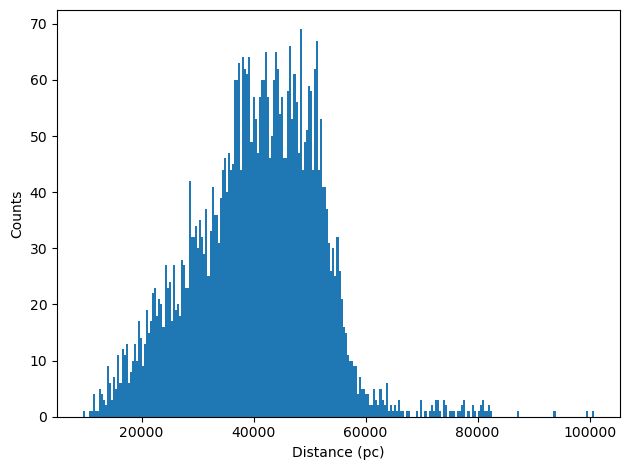

In [851]:
fig, ax = plt.subplots()
ax.set_xlabel("Distance (pc)")
ax.set_ylabel("Counts")
ax.hist(lmc_distances, bins = 250)
fig.tight_layout()

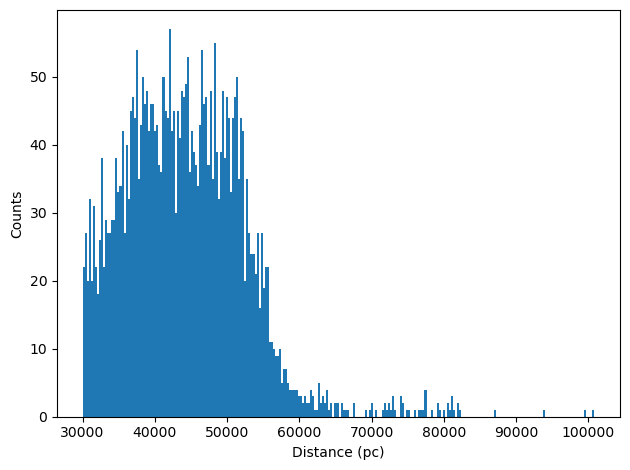

In [840]:
fig, ax = plt.subplots()
ax.set_xlabel("Distance (pc)")
ax.set_ylabel("Counts")
ax.hist(lmc_check, bins = 250)
fig.tight_layout()